In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
import plotly.express as px

In [42]:
china_data = pd.read_csv("china_dept_trap.csv")

In [43]:
china_data.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [44]:
china_data.tail()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
853,Zalingei-El Geneinah Road Construction,2009,$120M,ExImBank,Government,Transport,None Known,Sudan
854,Zanzibar Airport Terminal 2 Expansion,2010,$73M,ExImBank,Government,Transport,None Known,Tanzania
855,Zemun-Borca bridge,2009,$217M,ExImBank,Government,Transport,None Known,Serbia
856,Zongo II Hydropower Station,2011,$367M,ExImBank,Government,Power,None Known,"Congo, Democratic Republic of the"
857,Zungeru Hydropower Plant Project,2013,$984M,ExImBank,Government,Power,Within Indigenous Peoples' Lands,Nigeria


In [45]:
china_data.shape

(858, 8)

In [46]:
china_data.columns

Index(['Expand All | Collapse All', 'YEAR', 'AMOUNT', 'LENDER', 'BORROWER',
       'SECTOR', 'SENSITIVE TERRITORY OVERLAP', 'Country'],
      dtype='object')

In [47]:
china_data = china_data.rename(columns = {'Expand All | Collapse All' : 'Title'})

In [48]:
china_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Title                        858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


In [49]:
china_data.describe()

,YEAR
count,858.000000
mean,2013.268065
std,2.894155
min,2008.000000
25%,2011.000000
50%,2013.000000
75%,2016.000000
max,2019.000000


In [50]:
china_data.isnull().sum()

Title                          0
YEAR                           0
AMOUNT                         0
LENDER                         0
BORROWER                       1
SECTOR                         0
SENSITIVE TERRITORY OVERLAP    0
Country                        0
dtype: int64

In [51]:
china_data.dropna(inplace = True)

In [52]:
china_data.nunique()

Title                          827
YEAR                            12
AMOUNT                         346
LENDER                           7
BORROWER                       120
SECTOR                          10
SENSITIVE TERRITORY OVERLAP      8
Country                         94
dtype: int64

In [53]:
china_data['YEAR'].unique()

array([2011, 2009, 2012, 2016, 2015, 2017, 2018, 2014, 2008, 2010, 2013,
       2019], dtype=int64)

In [54]:
china_data['YEAR'].value_counts()

2016    133
2011    106
2013     91
2012     86
2015     79
2017     75
2014     70
2009     69
2010     58
2018     45
2008     40
2019      5
Name: YEAR, dtype: int64

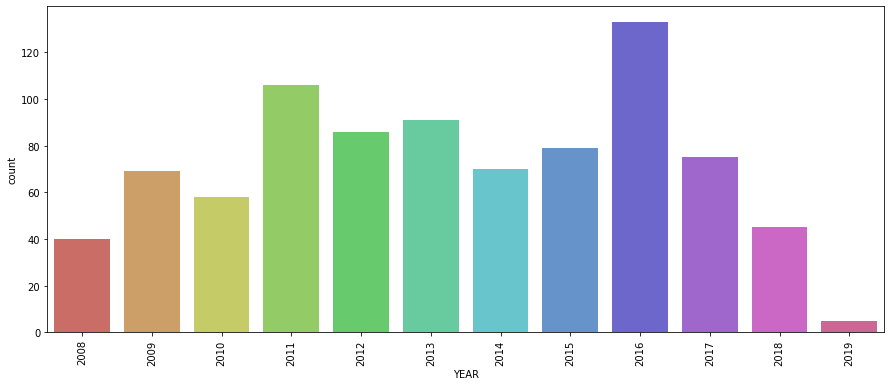

In [55]:
plt.figure(figsize=(15,6))
sns.countplot('YEAR', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [56]:
fig1 = px.histogram(china_data, x = 'YEAR', color = 'YEAR')
fig1.show()

In [57]:
china_data['LENDER'].unique()

array(['CDB', 'ExImBank', 'CDB, ExImBank', 'BOC, CDB, ExImBank',
       'CDB, ICBC', 'CDB, others', 'CDB, Citic'], dtype=object)

In [58]:
china_data['LENDER'].value_counts()

ExImBank              625
CDB                   219
CDB, ExImBank           8
CDB, ICBC               2
BOC, CDB, ExImBank      1
CDB, others             1
CDB, Citic              1
Name: LENDER, dtype: int64

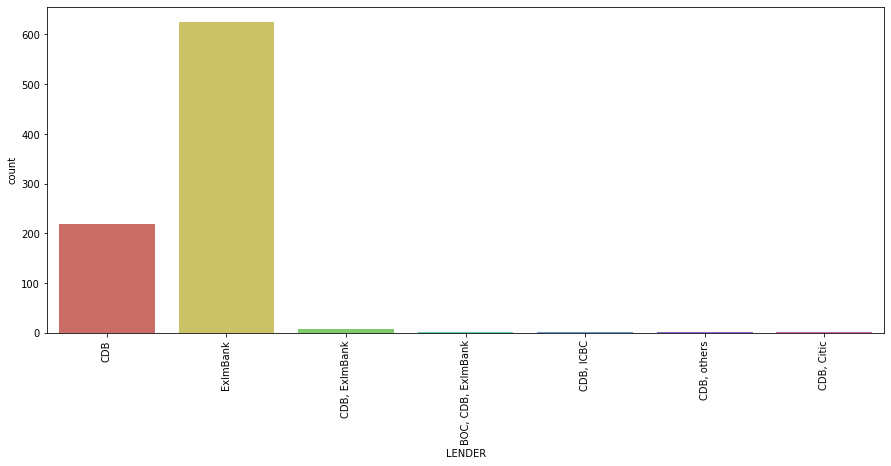

In [59]:
plt.figure(figsize=(15,6))
sns.countplot('LENDER', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [60]:
fig2 = px.histogram(china_data, x = 'LENDER', color = 'LENDER')
fig2.show()

In [61]:
china_data['SECTOR'].unique()

array(['Transport', 'Extraction, pipelines', 'Government', 'Power',
       'Mulit-sector/discretionary', 'Telecom', 'Other construction',
       'Agriculture, food', 'Manufacturing', 'fTransport'], dtype=object)

In [62]:
china_data['SECTOR'].value_counts()

Transport                     316
Power                         203
Government                    138
Telecom                        63
Extraction, pipelines          38
Mulit-sector/discretionary     30
Other construction             29
Agriculture, food              27
Manufacturing                  12
fTransport                      1
Name: SECTOR, dtype: int64

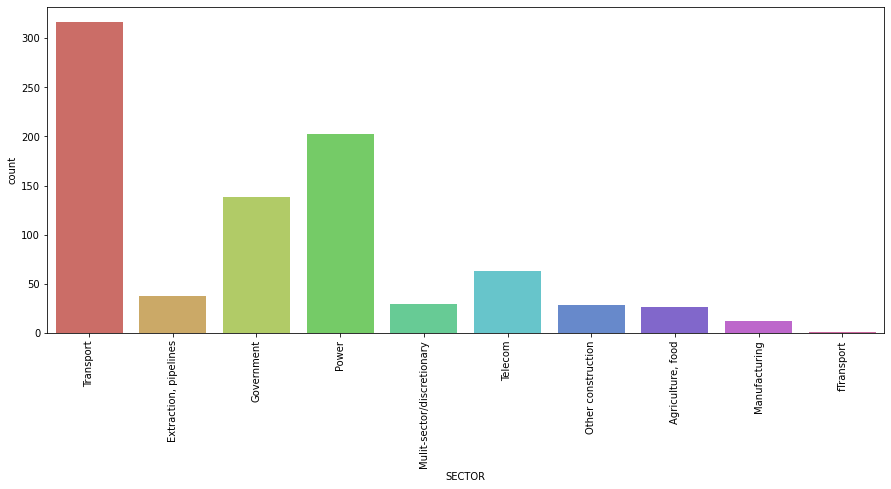

In [63]:
plt.figure(figsize=(15,6))
sns.countplot('SECTOR', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [64]:
fig3 = px.histogram(china_data, x = 'SECTOR', color = 'SECTOR')
fig3.show()

In [65]:
china_data['SENSITIVE TERRITORY OVERLAP'].unique()

array(['None Known',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats",
       "Within Indigenous Peoples' Lands",
       "Within Indigenous Peoples' Lands\n Within National Protected Areas",
       'Within Critical Habitats\n Within National Protected Areas',
       'Within Critical Habitats',
       "Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas",
       'Within National Protected Areas'], dtype=object)

In [66]:
china_data['SENSITIVE TERRITORY OVERLAP'].value_counts()

None Known                                                                                       524
Within Critical Habitats                                                                         124
Within Critical Habitats\n Within National Protected Areas                                        57
Within Indigenous Peoples' Lands\n Within Critical Habitats                                       45
Within Indigenous Peoples' Lands                                                                  41
Within Indigenous Peoples' Lands\n Within Critical Habitats\n Within National Protected Areas     34
Within National Protected Areas                                                                   19
Within Indigenous Peoples' Lands\n Within National Protected Areas                                13
Name: SENSITIVE TERRITORY OVERLAP, dtype: int64

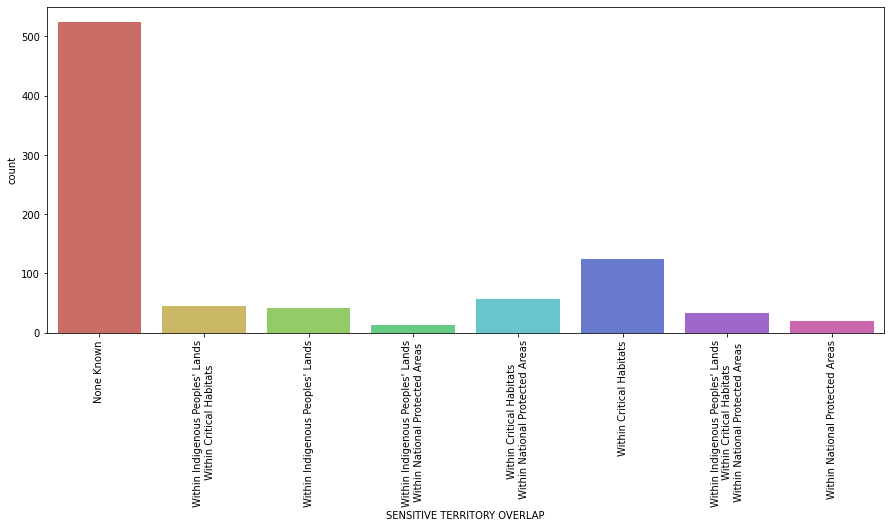

In [67]:
plt.figure(figsize=(15,6))
sns.countplot('SENSITIVE TERRITORY OVERLAP', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [68]:
china_data['Country'].unique()

array(['Angola', 'Brazil', 'Suriname', 'Cambodia', 'Kenya',
       'Congo, Democratic Republic of the', 'Laos', 'Bangladesh',
       'Nigeria', 'Benin', 'Zambia', 'Bahamas', "Cote d'Ivoire",
       'Ethiopia', 'Djibouti', 'Indonesia', 'Togo', 'Philippines',
       'Myanmar', 'Mozambique', 'Eritrea', 'Ukraine', 'South Sudan',
       'Sudan', 'Kyrgyz Republic', 'Uzbekistan', 'Ecuador', 'Mauritania',
       'Kazakhstan', 'Jordan', 'Niger', 'Mauritius', 'Pakistan', 'Mali',
       'Hungary', 'Serbia', 'Belarus', 'Morocco', 'Regional', 'Malawi',
       'Egypt', 'Tanzania', 'Congo, Republic of the', 'Fiji', 'Nepal',
       'Rwanda', 'Ghana', 'Senegal', 'Sri Lanka', 'Argentina', 'Guyana',
       'Trinidad and Tobago', 'Maldives', 'Bolivia', 'Vietnam', 'Gabon',
       'Montenegro', 'Papua New Guinea', 'Samoa', 'Iran', 'Cameroon',
       'Venezuela', 'Timor-Leste', 'Peru', 'Tajikistan', 'Malaysia',
       'Dominican Republic', 'Uganda', 'Russian Federation', 'Madagascar',
       'Turkmenistan', 

In [69]:
china_data['Country'].value_counts()

Angola                  115
Ethiopia                 34
Cambodia                 31
Sri Lanka                30
Indonesia                30
                       ... 
Malaysia                  1
Peru                      1
Hungary                   1
Jordan                    1
Bosnia & Herzegovina      1
Name: Country, Length: 94, dtype: int64

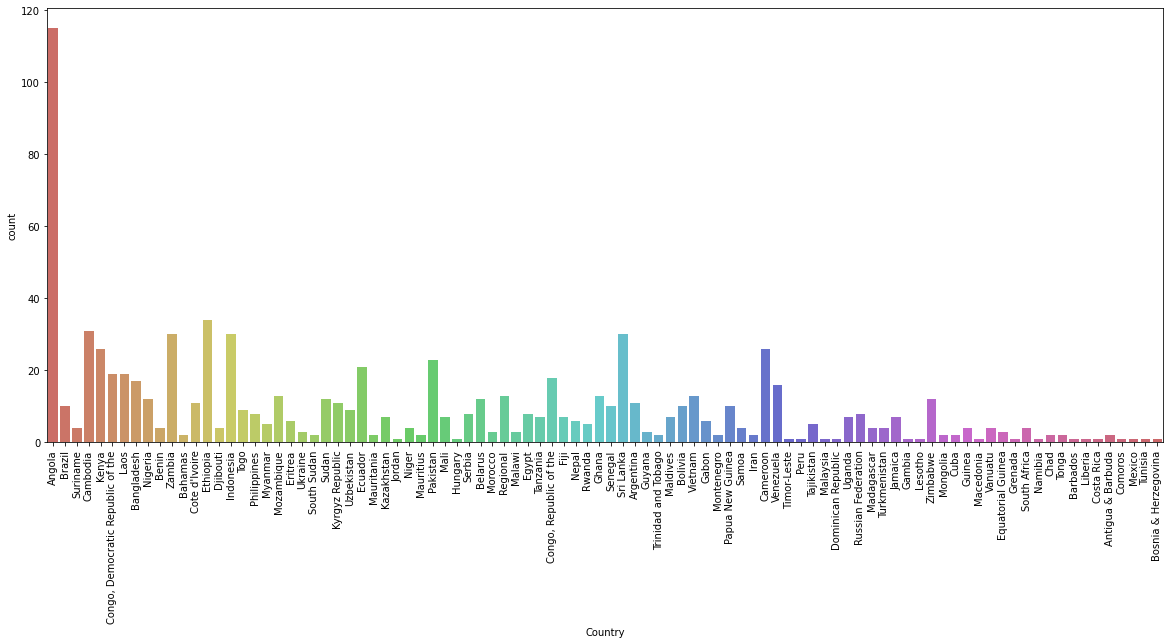

In [70]:
plt.figure(figsize=(20,8))
sns.countplot('Country', data = china_data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

In [71]:
def amount(a):
    y=a
    if ',' in a:
        a=a.replace(',','')
    a=float(a[1:-1])
    if y[-1]=='M':
        return a*1000000
    elif y[-1]=='B':
        return a*1000000000
    else:
        return 'Please check'

In [72]:
china_data['AMOUNT']=china_data['AMOUNT'].apply(amount)

In [73]:
china_data.head()

,Title,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,5.000000e+07,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,7.000000e+09,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,4.700000e+07,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,4.750000e+08,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,6.000000e+08,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


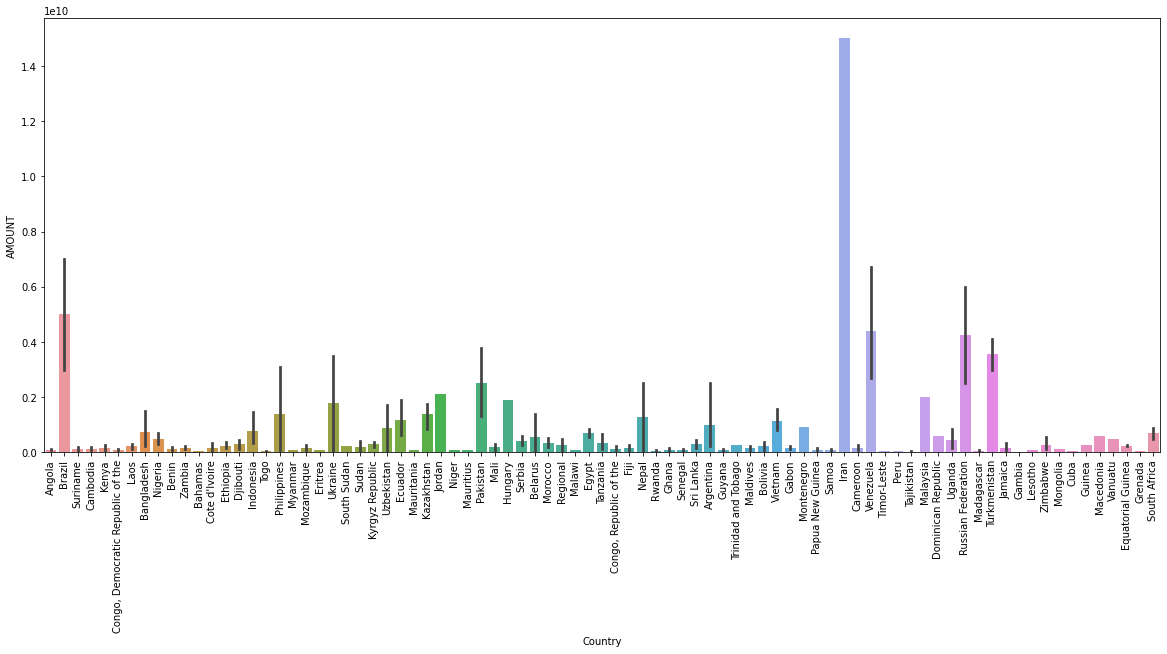

In [74]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Country',y = 'AMOUNT', data = china_data.head(500))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
fig = px.bar(x = 'Country',y = 'AMOUNT', data = china_data.head(500))
plt.xticks(rotation = 90)
plt.show()

In [87]:
fig4 = px.bar(china_data.head(500), 
                    x = "Country", y = "AMOUNT")
fig4.show()

In [86]:
fig5 = px.bar(china_data.tail(358), 
                    x = "Country", y = "AMOUNT")
fig5.show()

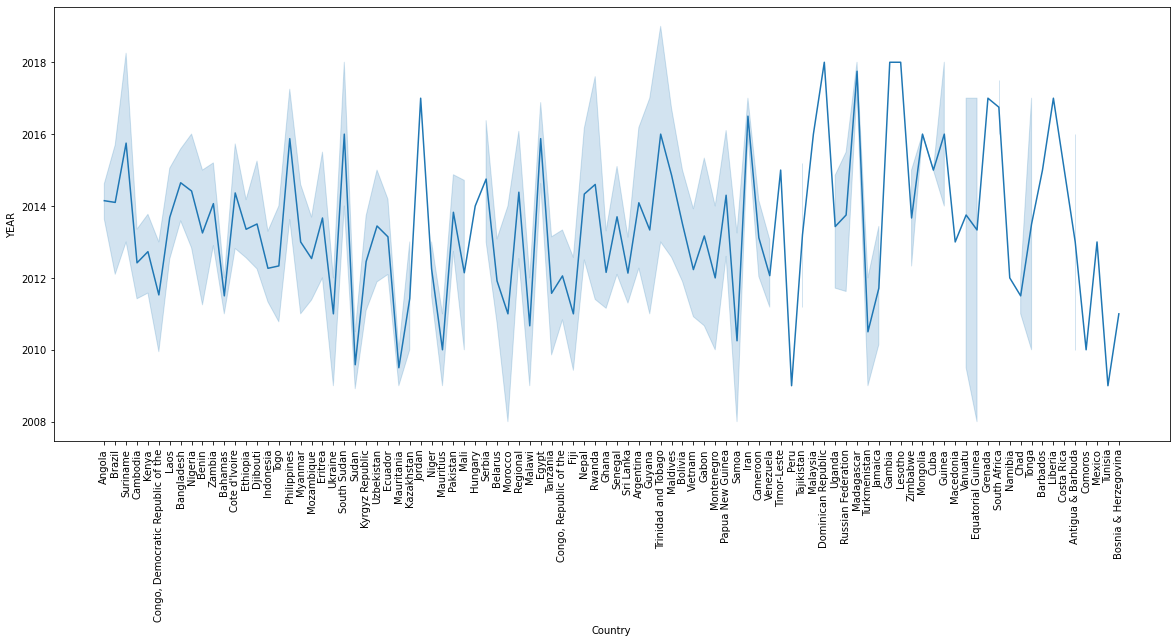

In [93]:
plt.figure(figsize=(20,8))
sns.lineplot(x = 'Country',y = 'YEAR', data = china_data)
plt.xticks(rotation = 90)
plt.show()

In [97]:
fig6 = px.histogram(china_data, 
                    x = "Country", color = "SECTOR")
fig6.show()

,YEAR,AMOUNT
0,2008,7.565000e+09
1,2009,6.240000e+10
2,2010,4.123500e+10
3,2011,3.394900e+10
4,2012,3.488600e+10
5,2013,4.185200e+10
6,2014,4.839100e+10
7,2015,5.110400e+10
8,2016,7.500100e+10
9,2017,4.924100e+10


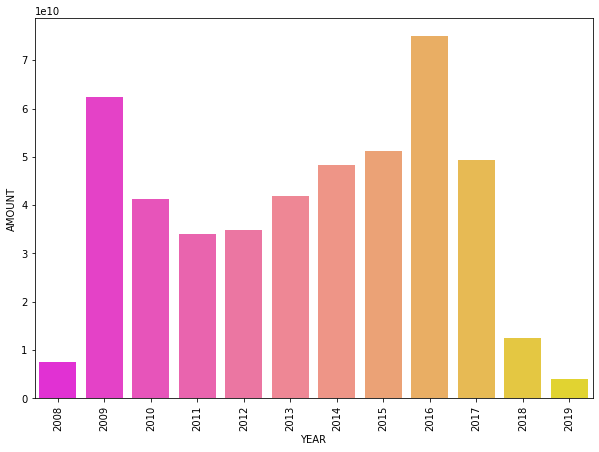

In [99]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
data=china_data.groupby('YEAR').sum().reset_index().sort_values('YEAR').sort_values('YEAR')
display(data)
sns.barplot(data=data,x='YEAR',y='AMOUNT',palette='spring')
plt.show()

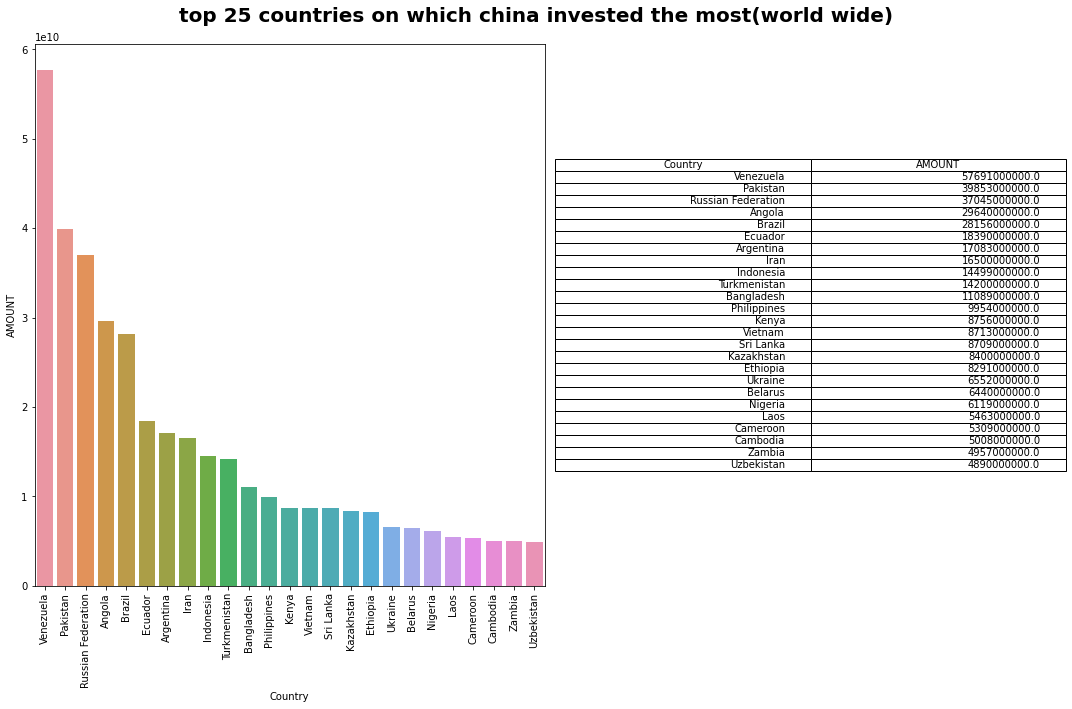

In [100]:
plt.figure(figsize=(15,10))
plt.suptitle('top 25 countries on which china invested the most(world wide)',size=20,weight='bold')
data=china_data.groupby('Country').sum().reset_index().sort_values('AMOUNT',ascending=False)[['Country','AMOUNT']]
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=data.head(25),x='Country',y='AMOUNT')
plt.subplot(1,2,2)
plt.axis('off')
plt.tight_layout()
plt.table(cellText=data.head(25).values, colLabels=data.columns, loc='center')

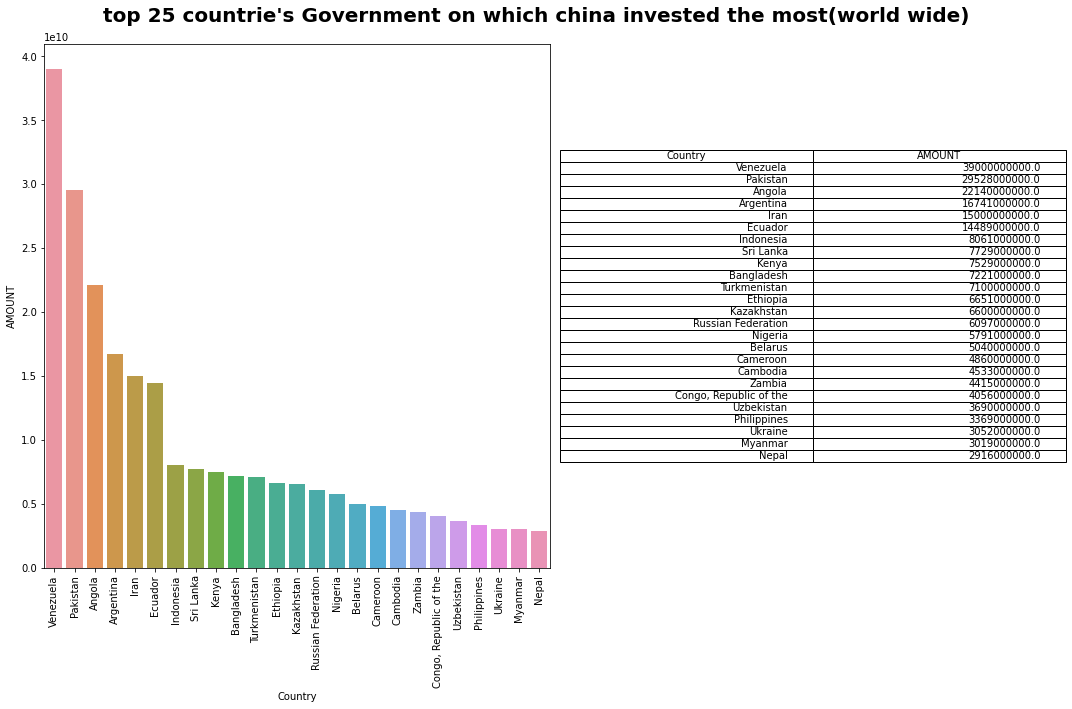

In [101]:
plt.figure(figsize=(15,10))
plt.suptitle("top 25 countrie's Government on which china invested the most(world wide)",size=20,weight='bold')
data=china_data[china_data['BORROWER']=='Government'].groupby('Country').sum().reset_index().sort_values('AMOUNT',ascending=False)[['Country','AMOUNT']]
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sns.barplot(data=data.head(25),x='Country',y='AMOUNT')
plt.subplot(1,2,2)
plt.axis('off')
plt.tight_layout()
plt.table(cellText=data.head(25).values, colLabels=data.columns, loc='center')

In [103]:
import textwrap

,YEAR,AMOUNT
0,2009,6.900000e+09
1,2014,6.500000e+09
2,2017,6.100000e+09
3,2016,2.900000e+09
4,2015,2.700000e+09
5,2015,2.700000e+09
6,2014,1.900000e+09
7,2014,1.600000e+09
8,2017,1.500000e+09
9,2017,1.200000e+09


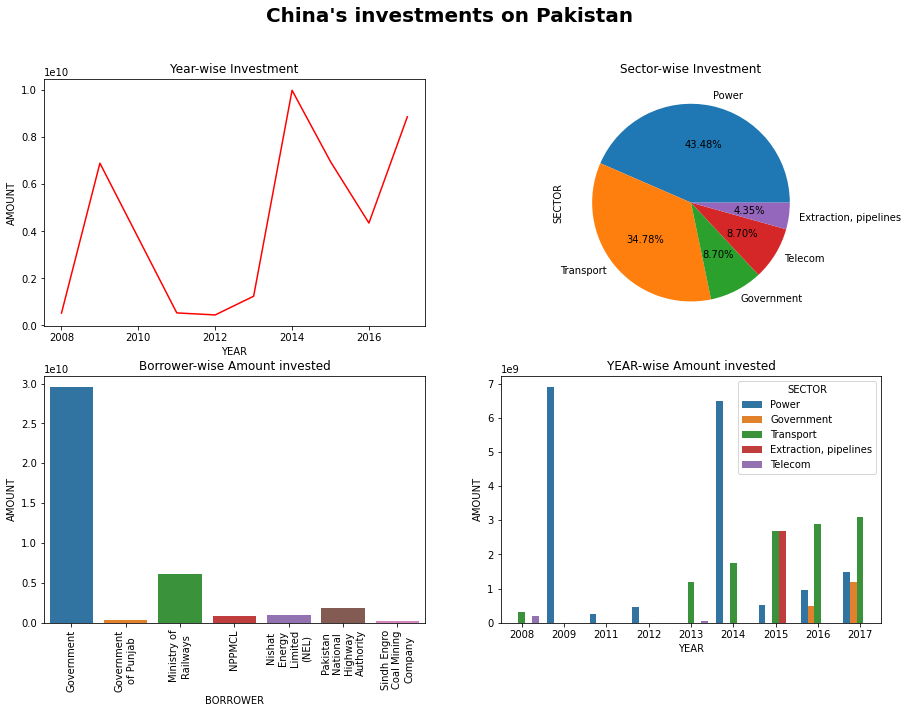

In [105]:
country='Pakistan'
data=china_data[china_data['Country']==country]
ax=plt.figure(figsize=(15,10))
plt.suptitle(f"China's investments on {country}",weight='bold',size=20)
plt.subplot(2,2,1)
plt.title('Year-wise Investment')
sns.lineplot(data=data.groupby('YEAR').sum().reset_index(),x='YEAR',y='AMOUNT',color='r')
plt.subplot(2,2,2)
plt.title('Sector-wise Investment')
data['SECTOR'].value_counts().plot.pie(autopct='%.2f%%')
plt.subplot(2,2,3)
plt.title('Borrower-wise Amount invested')
plt.xticks(rotation=90)
ax=sns.barplot(data=data.groupby('BORROWER').sum().reset_index(),x='BORROWER',y='AMOUNT')
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.subplot(2,2,4)
plt.title('YEAR-wise Amount invested')
ax=sns.barplot(data=data,x='YEAR',y='AMOUNT',hue='SECTOR',ci=False)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
display(data.sort_values('AMOUNT',ascending=False)[['YEAR','AMOUNT']].reset_index(drop=True))